# **Import library**

In [1]:
# %pip install xgboost

In [2]:
from xgboost import XGBClassifier, cv, DMatrix

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time

# **Load the data sets**

In [5]:
# def download_data(folder_id):
#     url = f"https://drive.google.com/drive/folders/{folder_id}"
#     # gdown URL format
#     gdown.download_folder(url=url, output="./downloaded_folder", quiet=False, use_cookies=False)

In [6]:
# def decompress_gz(file_path, output_file_name):
#     with gzip.open(file_path, 'rb') as f_in:
#         with open(output_file_name, 'wb') as f_out:
#             shutil.copyfileobj(f_in, f_out)

In [7]:
# if __name__ == '__main__':
#     # downloading raw dataset
#     download_data("14ZG8utOf0Ry76w_T9rqrk5kdhhPIK84P")
#     # Check if the downloaded folder exists before proceeding
#     import os
#     if os.path.exists('/kaggle/working/downloaded_folder/accepted_2007_to_2018Q4.csv.gz'):
#         decompress_gz('/kaggle/working/downloaded_folder/accepted_2007_to_2018Q4.csv.gz', "accepted.csv")
#     else:
#         print("Downloaded file not found. Please check the download process.")

In [8]:
accepted_df = pd.read_csv("/content/df_cleaned (2).csv", low_memory=False)
accepted_df.head()

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1


# **preprocessing**

In [9]:
df=accepted_df.copy()

In [10]:
df.shape

(119286, 21)

In [11]:
df.isna().sum()

,0
last_pymnt_d,0
total_rec_prncp,0
last_pymnt_amnt,0
out_prncp,0
total_rec_late_fee,0
last_fico_range_high,0
installment,0
loan_amnt,0
total_rec_int,0
out_prncp_inv,0


In [12]:
# Print all column names
print(accepted_df.columns.tolist())

['last_pymnt_d', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp', 'total_rec_late_fee', 'last_fico_range_high', 'installment', 'loan_amnt', 'total_rec_int', 'out_prncp_inv', 'total_pymnt', 'funded_amnt_inv', 'recoveries', 'debt_settlement_flag', 'hardship_flag', 'mo_sin_old_rev_tl_op', 'revol_util', 'dti', 'all_util', 'annual_inc', 'loan_status']


In [13]:
cat_cols = accepted_df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in cat_cols:
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])
      label_encoders[col] = le

In [14]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
y_train.value_counts(normalize=True)

,proportion
loan_status,
1,0.521199
0,0.478801


In [17]:
y_test.value_counts(normalize=True)

,proportion
loan_status,
1,0.515928
0,0.484072


In [18]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [19]:
learning_objective = {'objective':'binary:logistic' }
model = xgb.train(params = learning_objective, dtrain= dtrain)

In [20]:
test_predictions = model.predict(dtest)
round_test_predictions = [round(p) for p in test_predictions]
accuracy_score(y_test,round_test_predictions)

0.9847849777852292

# **Xgboost implementation**

In [21]:
def train_xgboost_model(X_train, y_train, X_test, y_test, objective='binary:logistic', eval_metric='auc', tree_method='hist',
                        learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1,
                        reg_lambda=1.0, seed=42, n_jobs=-1):
    """
    Train an XGBoost classifier and return the trained model.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    """
    # Convert to DMatrix (optimized XGBoost data structure)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Parameters aligned with XGBoost's theoretical improvements
    params = {
        'objective': objective,
        'eval_metric': eval_metric,
        'tree_method': tree_method,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'seed': seed,
        'n_jobs': n_jobs
    }

    # Early stopping (prevents overfitting)
    num_rounds = 100
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,
        early_stopping_rounds=20,
        verbose_eval=10
    )
    return model

In [22]:
# Train the XGBoost model
model = train_xgboost_model(X_train, y_train, X_test, y_test)

# Make predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")



[0]	train-auc:0.99485	eval-auc:0.99444
[10]	train-auc:0.99796	eval-auc:0.99787
[20]	train-auc:0.99863	eval-auc:0.99848
[30]	train-auc:0.99891	eval-auc:0.99883
[40]	train-auc:0.99912	eval-auc:0.99900
[50]	train-auc:0.99922	eval-auc:0.99908
[60]	train-auc:0.99933	eval-auc:0.99917
[70]	train-auc:0.99940	eval-auc:0.99922
[80]	train-auc:0.99949	eval-auc:0.99923
[90]	train-auc:0.99955	eval-auc:0.99926
[99]	train-auc:0.99959	eval-auc:0.99927
Accuracy: 0.9900
AUC: 0.9993


In [23]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print formatted metrics in a table
print("\nPerformance Metrics:")
print("| Metric    | Score      |")
print("|-----------|------------|")
print(f"| Accuracy  | {accuracy:.1f}%    |")
print(f"| F1 Score  | {f1:.3f}    |")
print(f"| ROC-AUC   | {auc_score:.3f}    |")

# Print the original detailed outputs
print(f"\nDetailed Accuracy: {accuracy:.1f}%")
print(f"Detailed AUC: {auc_score:.4f}")


Performance Metrics:
| Metric    | Score      |
|-----------|------------|
| Accuracy  | 99.0%    |
| F1 Score  | 0.990    |
| ROC-AUC   | 0.999    |

Detailed Accuracy: 99.0%
Detailed AUC: 0.9993


In [24]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11549
           1       0.99      0.99      0.99     12309

    accuracy                           0.99     23858
   macro avg       0.99      0.99      0.99     23858
weighted avg       0.99      0.99      0.99     23858



<Figure size 1200x600 with 0 Axes>

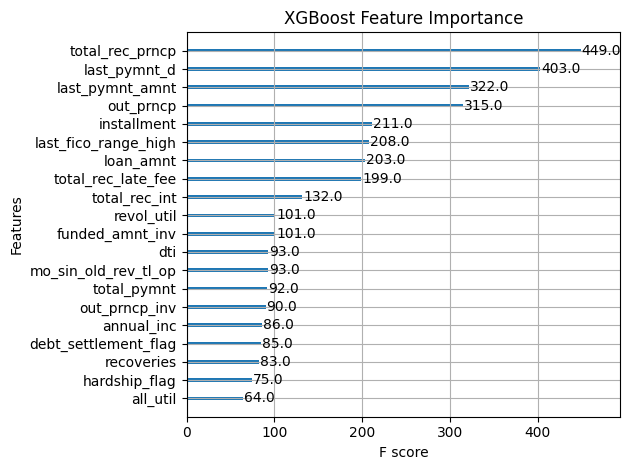

In [25]:
# Plot feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(model, max_num_features=20)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [26]:
# Get feature importance scores
importance_scores = model.get_score(importance_type='weight')
sorted_features = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 features
print("\nTop 10 Most Important Features:")
print("| Rank | Feature Name       | Importance Score |")
print("|------|--------------------|------------------|")
for i, (feature, score) in enumerate(sorted_features[:20], 1):
    print(f"| {i:<4} | {feature:<18} | {score:<16} |")



Top 10 Most Important Features:
| Rank | Feature Name       | Importance Score |
|------|--------------------|------------------|
| 1    | total_rec_prncp    | 449.0            |
| 2    | last_pymnt_d       | 403.0            |
| 3    | last_pymnt_amnt    | 322.0            |
| 4    | out_prncp          | 315.0            |
| 5    | installment        | 211.0            |
| 6    | last_fico_range_high | 208.0            |
| 7    | loan_amnt          | 203.0            |
| 8    | total_rec_late_fee | 199.0            |
| 9    | total_rec_int      | 132.0            |
| 10   | funded_amnt_inv    | 101.0            |
| 11   | revol_util         | 101.0            |
| 12   | mo_sin_old_rev_tl_op | 93.0             |
| 13   | dti                | 93.0             |
| 14   | total_pymnt        | 92.0             |
| 15   | out_prncp_inv      | 90.0             |
| 16   | annual_inc         | 86.0             |
| 17   | debt_settlement_flag | 85.0             |
| 18   | recoveries         | 